In [22]:
import sys
sys.path.append('../')

In [23]:
from scripts.utils import data_path
from scripts.cross_match_scripts import build_keras_model, plot_metrics, assess_classifier, save_keras_classifier, assess_classifier, photo_prior_create_train_test_validation_data
import pandas as pd
from tqdm import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
import pickle
%matplotlib inline
photo_cat_scaled = pd.read_pickle('model/train_test_validation_data.pkl')

load_models = False


## GRZ data 

In [24]:
learning_dict = photo_prior_create_train_test_validation_data(photo_cat_scaled=photo_cat_scaled, features_cols = 'grz')

total x-ray sources:  32731
total non-x-ray sources:  214209
total sources:  246940
number of x-ray sources per flux bin:
x_ray_flux_bin
0    32731
dtype: int64
number of non-x-ray sources per flux bin:
x_ray_flux_bin
0    214209
dtype: int64
x-ray flux bins:
[3.00076359e-15 3.92776796e-12]
********************
flux bin:  3.0007635913564e-15 3.927767961003e-12
train features: 
  ['rel_dered_mag_g', 'rel_dered_mag_r', 'rel_dered_mag_z', 'rel_dered_g_r', 'rel_dered_r_z', 'rel_dered_g_z']
train size examples - filed:  119956
train size examples - x-ray: 18330
test size examples - filed:  29990
test size examples - x-ray 4582
validation size examples - filed:  64263
validation size examples - x-ray: 9819
downsampled field sources:  False
data is scaled


In [25]:
X_train, y_train, X_test, y_test, X_val, y_val = learning_dict[0]['X_train'], learning_dict[0]['y_train'], learning_dict[0]['X_test'], learning_dict[0]['y_test'], learning_dict[0]['X_val'], learning_dict[0]['y_val']


X_all = np.concatenate((X_train, X_test, X_val))
y_all = np.concatenate((y_train, y_test, y_val))[:,0]


#X_ctps = X_all[y_all == 1]
#X_field = X_all[y_all == 0]

features = ['rel_dered_mag_g', 'rel_dered_mag_r', 'rel_dered_mag_z', 'rel_dered_g_r', 'rel_dered_r_z', 'rel_dered_g_z']


df = pd.DataFrame(X_all, columns=features)
df['is_counterpart'] = y_all
df

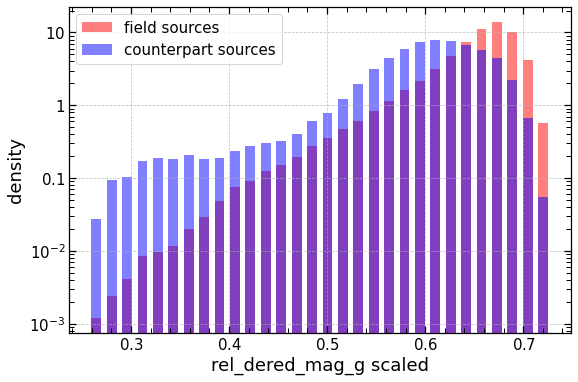

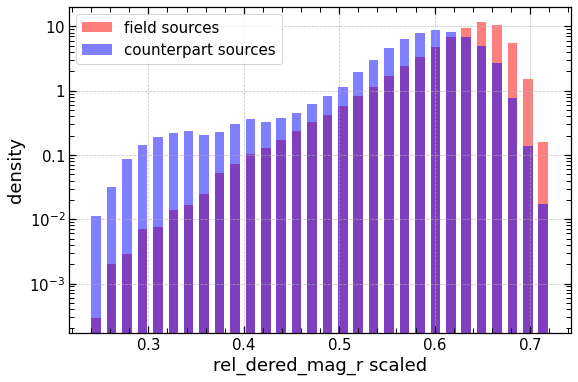

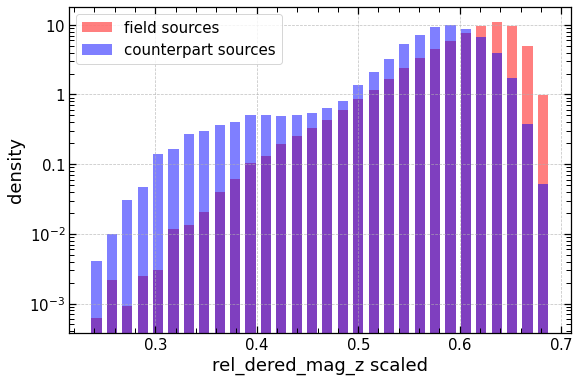

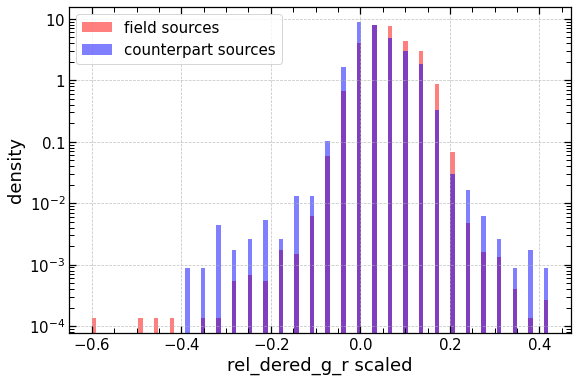

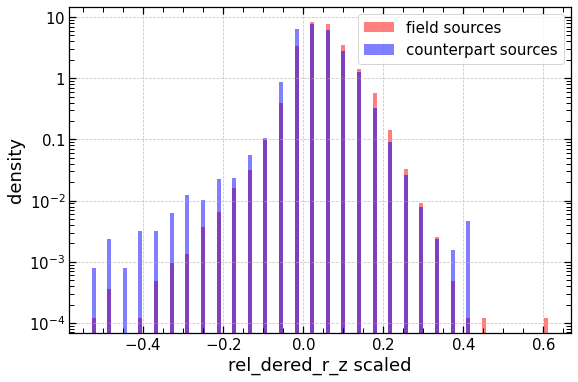

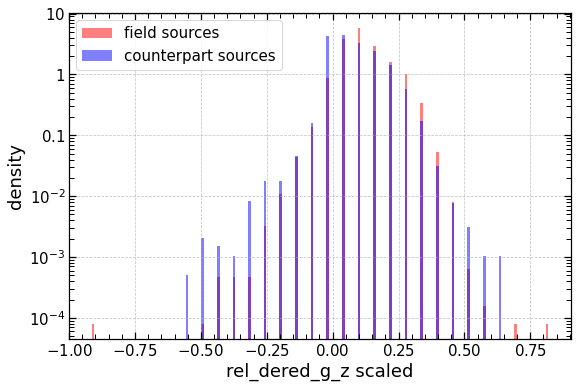

In [35]:
histbins = 30
for feature in features:
    f_ctps = df[df['is_counterpart'] == 1][feature]
    f_field = df[df['is_counterpart'] == 0][feature]

    #bins = np.linspace(f_field.min(), f_field.max(), histbins)
    hist_field, bin_field = np.histogram(f_field, bins=histbins, density=True)  
    hist_ctsp, bin_ctsp = np.histogram(f_ctps, bins=bin_field, density=True)

    plt.figure(figsize=(9,6))
    plt.bar(bin_field[:-1], hist_field, width=0.01, color='r', label='field sources', alpha = 0.5)
    plt.bar(bin_ctsp[:-1], hist_ctsp, width=0.01, color='b', label='counterpart sources', alpha = 0.5)
    plt.legend()
    plt.yscale('log')
    plt.xlabel(feature+' scaled')
    plt.ylabel('density')

    #save histograms in one file:
    #with columns lo, hi, selected, others
    hist_df = pd.DataFrame({'lo':bin_field[:-1], 'hi':bin_field[1:], 'selected':hist_ctsp, 'others':hist_field})

    hist_df.to_csv('./model/'+ feature +'.csv', index=False, sep = '\t', header = ['#lo', 'hi', 'selected', 'others'])


